In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

In [2]:
cols = ['Income',
        'Kidhome',
        'Teenhome',
        'Recency',
        'NumWebVisitsMonth',
        'MntWines',
        'MntFruits',
        'MntMeatProducts',
        'MntFishProducts',
        'MntSweetProducts',
        'MntGoldProds',
        'NumDealsPurchases',
        'NumWebPurchases',
        'NumCatalogPurchases',
        'NumStorePurchases',
        'NumWebVisitsMonth']

data = pd.read_csv('data/marketing_campaign.csv', sep='\;', engine='python', usecols=cols)
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5


In [3]:
data.isnull().sum()

Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
dtype: int64

In [4]:
data = data.fillna(data.median(numeric_only=True))

In [5]:
data.isnull().sum()

Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

In [6]:
# Scaling data
X = data.to_numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a FactorAnalysis object and fit it to our data
fa = FactorAnalysis(n_components=2, rotation='varimax')
fa.fit(X_scaled)

FactorAnalysis(n_components=2, rotation='varimax')

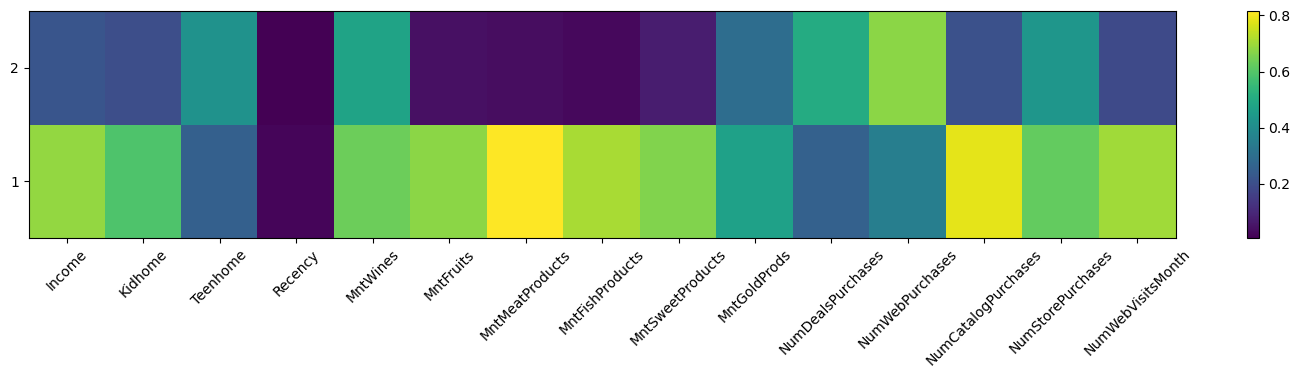

In [7]:
# Plot
Z=np.abs(fa.components_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)

fig.set_size_inches(18.5, 3)
fig.set_dpi(100)

ax.set_yticks(np.arange(fa.components_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.components_.shape[1])+0.5, minor=False)
ax.set_yticklabels(np.arange(fa.components_.shape[0])+1)
ax.set_xticklabels(list(data), rotation = 45)
plt.show()

In [8]:
# Print the factor scores for each row of the matrix A
print(fa.transform(X_scaled))

[[ 1.47112446 -0.38873915]
 [-0.74433248  0.69906957]
 [ 0.56882322 -0.40446444]
 ...
 [ 0.53021841 -0.29214112]
 [ 0.64914428 -0.55127049]
 [-0.77658481 -0.037003  ]]
